<a href="https://colab.research.google.com/github/divyanshraghuwanshi123/Projects/blob/main/quantile_regres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [98]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [99]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-rtnydde6
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-rtnydde6


In [100]:
%load_ext nvcc_plugin

The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin


In [112]:
df = pd.read_csv('autos_new.csv')
df

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online
0,2016-03-24,A5_Sportback_2.7_Tdi,18300,coupé,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
1,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",9800,NaN,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein,2016-03-17,91074,2016-03-17
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja,2016-04-04,33775,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335106,2016-03-14,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,39576,2016-04-06
335107,2016-03-05,Smart_smart_leistungssteigerung_100ps,1199,convertible,2000,automatik,101,fortwo,125000,3,gasoline,smart,nein,2016-03-05,26135,2016-03-11
335108,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07
335109,2016-03-20,VW_Golf_Kombi_1_9l_TDI,3400,station wagon,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,40764,2016-03-24


In [113]:
col=df.columns
print(type(col))

<class 'pandas.core.indexes.base.Index'>


In [114]:
# drop_col=['date_crawled','name']
df.drop(['date_crawled','name','ad_created','last_seen_online'],axis=1,inplace=True)
df.head()

,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,postal_code
0,18300,coupé,2011,manuell,190,NaN,125000,5,diesel,audi,ja,66954
1,9800,NaN,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,90480
2,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein,91074
3,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437
4,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja,33775


In [115]:
df.describe()

,dollar_price,registration_year,power_ps,kilometer,registration_month,postal_code
count,335111.000000,335111.000000,335111.000000,335111.000000,335111.000000,335111.000000
mean,6291.242606,2003.733148,120.694191,125235.354853,5.924986,51269.627368
std,8608.259613,7.272514,190.797297,39612.753443,3.631074,25714.890506
min,500.000000,1945.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1500.000000,2000.000000,75.000000,100000.000000,3.000000,30952.000000
50%,3500.000000,2004.000000,110.000000,150000.000000,6.000000,50226.000000
75%,7900.000000,2008.000000,150.000000,150000.000000,9.000000,72124.000000
max,245000.000000,2016.000000,20000.000000,150000.000000,12.000000,99998.000000


In [116]:
data=np.array(df)

In [117]:
df.dropna(inplace=True)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235829 entries, 2 to 335110
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   dollar_price        235829 non-null  int64 
 1   vehicle_type        235829 non-null  object
 2   registration_year   235829 non-null  int64 
 3   gearbox             235829 non-null  object
 4   power_ps            235829 non-null  int64 
 5   model               235829 non-null  object
 6   kilometer           235829 non-null  int64 
 7   registration_month  235829 non-null  int64 
 8   fuel_type           235829 non-null  object
 9   brand               235829 non-null  object
 10  unrepaired_damage   235829 non-null  object
 11  postal_code         235829 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.4+ MB


In [119]:
df.to_csv("autos_modified.csv")

In [120]:
df.reset_index(drop=True,inplace=True)
df.head(n=15)
# print(type(ds))

,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,postal_code
0,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein,91074
1,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437
2,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja,33775
3,2200,convertible,2004,manuell,109,2_reihe,150000,8,gasoline,peugeot,nein,67112
4,2000,limousine,2004,manuell,105,3_reihe,150000,12,gasoline,mazda,nein,96224
5,2799,station wagon,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,57290
6,1750,small car,2004,automatik,75,twingo,150000,2,gasoline,renault,nein,65599
7,7550,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein,88361
8,1850,bus,2004,manuell,102,a_klasse,150000,1,gasoline,mercedes_benz,nein,49565
9,10400,coupé,2009,manuell,160,scirocco,100000,4,gasoline,volkswagen,nein,75365


In [121]:
le = LabelEncoder()
#Applies transformation on each columns
ds = df.apply(le.fit_transform)

In [122]:
ds

,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,postal_code
0,373,5,53,1,73,114,12,6,2,37,1,6953
1,937,5,60,1,67,100,9,7,1,31,1,4157
2,66,3,47,1,100,11,12,10,2,2,0,2331
3,570,1,56,1,107,8,12,8,2,25,1,4579
4,526,3,56,1,103,10,12,12,2,19,1,7665
...,...,...,...,...,...,...,...,...,...,...,...,...
235824,836,3,56,1,223,137,12,5,2,30,0,7699
235825,248,0,52,1,0,239,12,3,2,24,1,1823
235826,266,1,52,0,99,105,11,3,2,32,1,1785
235827,2001,0,48,1,100,215,12,3,1,37,1,6561


In [123]:
import torch

In [124]:
X = np.array(ds.iloc[:, 1:])
Y = np.array(ds.iloc[:, 0])
X = X.astype("float32")
Y = Y.astype("float32")
X

array([[5.000e+00, 5.300e+01, 1.000e+00, ..., 3.700e+01, 1.000e+00,
        6.953e+03],
       [5.000e+00, 6.000e+01, 1.000e+00, ..., 3.100e+01, 1.000e+00,
        4.157e+03],
       [3.000e+00, 4.700e+01, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        2.331e+03],
       ...,
       [1.000e+00, 5.200e+01, 0.000e+00, ..., 3.200e+01, 1.000e+00,
        1.785e+03],
       [0.000e+00, 4.800e+01, 1.000e+00, ..., 3.700e+01, 1.000e+00,
        6.561e+03],
       [3.000e+00, 6.500e+01, 1.000e+00, ..., 2.000e+00, 1.000e+00,
        5.111e+03]], dtype=float32)

In [125]:
from sklearn.model_selection import train_test_split
train_x_tr, X_test, train_y_tr, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
train_x_tr=torch.from_numpy(train_x_tr)
train_y_tr=torch.from_numpy(train_y_tr)
X_test=torch.from_numpy(X_test)
y_test=torch.from_numpy(y_test)

train_x_tr

tensor([[5.0000e+00, 4.8000e+01, 1.0000e+00,  ..., 3.7000e+01, 1.0000e+00,
         2.7110e+03],
        [0.0000e+00, 5.4000e+01, 0.0000e+00,  ..., 1.0000e+01, 1.0000e+00,
         5.1960e+03],
        [3.0000e+00, 5.8000e+01, 1.0000e+00,  ..., 2.0000e+00, 1.0000e+00,
         3.4830e+03],
        ...,
        [6.0000e+00, 5.7000e+01, 1.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         4.8800e+02],
        [5.0000e+00, 4.8000e+01, 1.0000e+00,  ..., 9.0000e+00, 1.0000e+00,
         3.6210e+03],
        [1.0000e+00, 5.2000e+01, 1.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         6.3590e+03]])

In [172]:
losses=[]

In [173]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()
        #self.linear_yq1_output = torch.nn.Linear(30,1)
        #self.linear_yq2_output = torch.nn.Linear(30,1)
        #self.linear_yq3_output = torch.nn.Linear(30,1)

        self.net = torch.nn.Sequential(
        torch.nn.Linear(11, 30),
        torch.nn.LeakyReLU(),
        #torch.nn.Tanh(),
        
        torch.nn.Linear(30, 30),
        torch.nn.LeakyReLU(),
            
        torch.nn.Linear(30,3)

        #torch.nn.Tanh(),
        )

    def forward(self,x):
        return self.net(x)
    
modelA = MyModel()
modelA = modelA.cuda()

optimizer = torch.optim.Adam(params=modelA.parameters(), lr=0.005)

def criterion(input, target):
    ## Other Losses
    # Normal loss
    #loss = (((input[0] - target)/torch.exp(input[1]))**2+input[1]).mean()
    # Laplace loss
    #loss = (torch.abs((input[0] - target)/torch.exp(input[1]))+input[1]).mean()
    # t-distribution loss
    #nu = 3
    #loss = ((nu + 1)/2*torch.log(1+((input[0] - target)/torch.exp(input[1]))**2/nu)+input[1]).mean()
    # print(input, target)

    ## Quanile Loss
    q1 = 0.05
    q2 = 0.5
    q3 = 0.95
    

    ## Keras quantile loss, https://www.evergreeninnovations.co/blog-quantile-loss-function-for-machine-learning/    
    #e = y_p-y    
    #return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))

    ## Quantile Loss
    ## for q1, q2, q3
    #print(input.shape)
    #print(input[:,0:1].shape)
    #print(target.shape)
    e1 = input[:, 0] - target # !!! if input[:,0]  -> shape = (1000,)
    e2 = input[:, 1] - target
    e3 = input[:, 2] - target
    eq1 = torch.max(q1*e1, (q1-1)*e1)
    eq2 = torch.max(q2*e2, (q2-1)*e2)
    eq3 = torch.max(q3*e3, (q3-1)*e3)
    
    #eq1 = torch.max(0.05*e1, (0.05-1)*e1)
    #eq2 = torch.max(0.5*e2, (0.5-1)*e2)
    #eq3 = torch.max(0.95*e3, (0.95-1)*e3)

    loss = (eq1 + eq2 + eq3).mean()

    return loss
    
train_x_tr = train_x_tr.cuda()    
train_y_tr = train_y_tr.cuda()

for step in range(6000):
    #yq1, yq2, yq3 = model(x)
    #loss = criterion(input=(yq1, yq2, yq3), target=y)
    yqs = modelA(train_x_tr)
    loss = criterion(input=yqs, target =train_y_tr)
    #print(yqs.shape, train_y_tr.shape)
    optimizer.zero_grad()
    loss.backward()
    losses.append(loss)
    optimizer.step()

    if (step+1) % 1000 == 0:
        """
        Show your intermediate results
        """
        print('epoch {} loss={:.4}'.format(step+1, loss.data.item()))
        pass

epoch 1000 loss=303.4
epoch 2000 loss=295.6
epoch 3000 loss=286.7
epoch 4000 loss=271.2
epoch 5000 loss=248.3
epoch 6000 loss=241.1


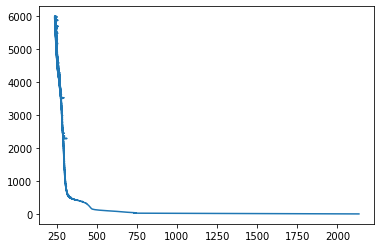

In [174]:
import matplotlib.pyplot as plt
steps=range(1,6001)
plt.plot(losses,steps)
plt.show()

In [175]:
y_pred = modelA(X_test.cuda())
y_pred=y_pred[:,1]
y_pred = y_pred.detach().cpu().numpy()
y_pred 

array([ 123.30044, 1646.7871 ,  572.8508 , ...,  849.7286 ,  198.17813,
        518.76117], dtype=float32)

In [176]:
y_test=np.array(y_test)
y_test

array([ 128., 1961.,  163., ...,  735.,  208.,  660.], dtype=float32)

In [142]:
from sklearn.metrics import mean_absolute_error

In [177]:
mean_absolute_error(y_test,y_pred)

315.18787